# Special Question:
This question has the highest evaluatory points but is totally optional: [OPTIONAL]

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Create a python notebook and perform an exploratory data analysis (EDA) of the titanic datasets to answers the questions like : “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc), how may passengers were male/female, different class.

The dataset has about 12 columns, which are explained below;

PassengerId: unique IDs for each passenger onboard.

Survived: 1 indicates those who survived the shipwreck while 0 indicate those who failed.

Pclass: Passenger's socio-economic class, i.e 1st, 2nd or 3rd.

Name: Name of each passenger

Sex: Gender of each passemger

Age: Age of each passenger

SibSp: number of siblings and spouses of each passenger.

Parch: number of parents and children of each passenger.

Ticket: Ticket number of each passenger

Fare: Amount paid by each passenger

Cabin: Cabin seat of each passenger

Embarked: location where the passengers embarked from(either S-Southampton, Q-Queenstown or C-Cherbourg)

In [50]:
import pandas as pd

In [2]:
df = pd.read_csv('data\\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Change the name format 
Since the name is also in csv form, firstly a function was written to change the name from csv format to a more understandable format

In [3]:
def rearrange_name(name):
    name_parts = name.split(", ")
    return name_parts[1] + " " + name_parts[0]
df['Name'] = df['Name'].apply(rearrange_name)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
total = df['PassengerId']
len(total)

891

# TOTAL PASSENGERS IN THE TITANIC
There were 891 total passengers in the Titanic.


In [5]:
survived = df[df['Survived'] == 1]
survivor = len(survived)
survivor

342

# SURVIVORS 
Out of those 891 passengers, only 342 survived.

In [7]:
deaths = total - survived


# DEATHS
549 people out of those 891 people died.

In [13]:
male = df[df['Sex']=='male']
male.to_excel('male_passengers.xlsx')

In [157]:
female = df[df['Sex'] == 'female']
female.to_excel('female_passengers.xlsx')

In [64]:
male_survivors = male[male['Survived'] == 1]
male_survivors.to_excel('male_surviors.xlsx')

In [65]:
female_survivors = female[female['Survived'] == 1]
female_survivors.to_excel('female_surviors.xlsx')

In [66]:
dead_male_passengers = male[male['Survived'] == 0]
dead_female_passengers = female[female['Survived'] == 1]
dead_male_passengers.to_excel('male_deaths.xlsx')
dead_female_passengers.to_excel('female_deaths.xlsx')

# Male and Female passengers
All the details of male passengers are stored in the 'male_passengers.xlsx' excel file and all the details of female passengers are stored in the 'female_passengers.xlsx' file.


From the excel reports, out of the 891 passengers, 578 of them are male while 315 are female.

From the 578 male passengers, only 109 survived and from the 315 female passengers, 233 survived. The details of both the male and the female passengers are stored in their respective 'Male Passenger Data' and 'Female Passengers Data'. Similarly, the data of the demised male passengers and the demised female passengers are stored in their respective folders.

In [8]:
underage = df[df['Age'] <= 16]
overage = df[df['Age'] > 16]

In [9]:
len(underage)

100

In [10]:
len(overage)

614

In [70]:
underaged_survivors = underage[underage['Survived'] == 1]
underage_deaths = underage[underage['Survived'] == 0]
underaged_survivors.to_excel('underage_survivors.xlsx')
underage_deaths.to_excel('underage_deaths.xlsx')

# Age groups
So, the number of passengers whose age is 16 or below 16 is 100 and the number of people over the age of 16 is 614. But, out of all the passengers, the amount of passengers whose age cannot be identified is 177.

The details of all the survived and demised underage passengers are stored in the Under Age Passengers folder which contains two excel files.

In [11]:
mean_age = round(df['Age'].mean(),2)
mean_age

29.7

The mean age of the passengers is 29.7 years old.

In [14]:
mean_age_male = round(male['Age'].mean(),2)
mean_age_male

30.73

In [ ]:
mean_age_female = round(female['Age'].mean(),2)
mean_age_female

27.92

The average male age is 30.73.

The average female age is 27.92.

In [45]:
import matplotlib.pyplot as plt

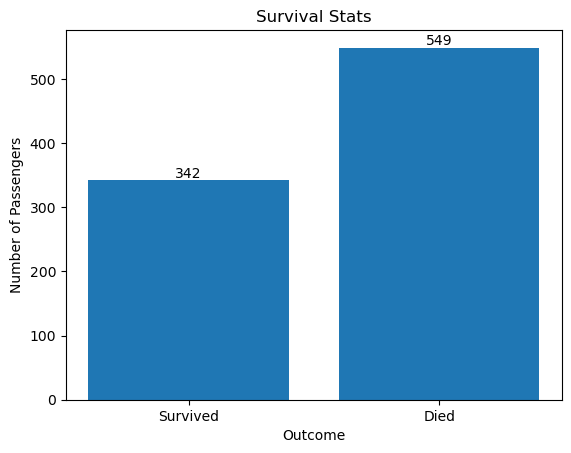

In [112]:
plt.bar(['Survived', 'Died'], [survivor, deaths])
plt.title('Survival Stats')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')

for i, v in enumerate([survivor, deaths]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

The graph shows the outcome of the Titanic.

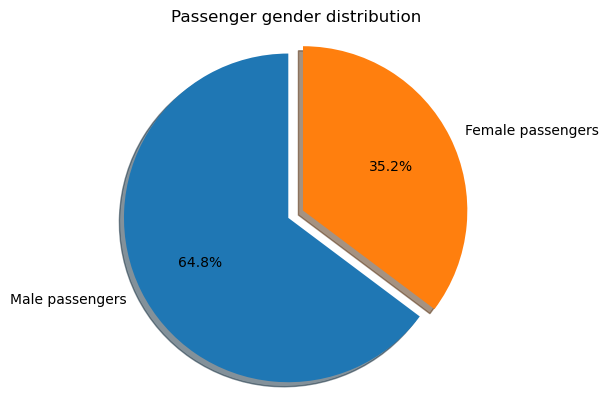

In [128]:
labels = ['Male passengers','Female passengers']
sizes = [len(male),len(female)]

explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal') 
plt.title('Passenger gender distribution')
plt.show()

The pie chart shows the gender distribution between male and female passengers.

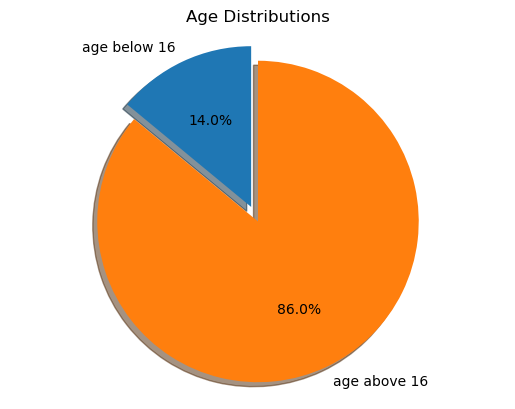

In [130]:
labels = ['age below 16','age above 16']
sizes = [len(underage),len(overage)]
mycolors = ['#1f77b4', '#ff7f0e']

explode = (0.1, 0)
plt.pie(sizes, explode=explode,colors=mycolors,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal') 
plt.title('Age Distributions')
plt.show()

This pie chart shows the distribution of passengers with ages below and above 16.

In [133]:
average_fare = round(df['Fare'].mean(),2)
average_fare

32.2

# The average fare of travel is 32.2.

In [139]:
has_sib_spouce = df[df['SibSp'] != 0]
has_sib_spouce.to_excel('has_sib_spouce.xlsx')

has_no_sibspouce = df[df['SibSp'] == 0]
has_no_sibspouce.to_excel('has_no_sib_spouce.xlsx')

# Sibling and Spouce

Out of all the passengers, 283 of the passengers have 1 or more sibling/spouce.

And  passengers, 608 have no siblings or spouce on board.

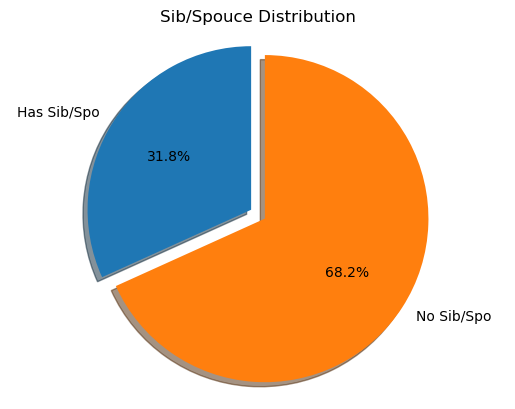

In [142]:
labels = ['Has Sib/Spo','No Sib/Spo']
sizes = [len(has_sib_spouce),len(has_no_sibspouce)]
mycolors = ['#1f77b4', '#ff7f0e']

explode = (0.1, 0)
plt.pie(sizes, explode=explode,colors=mycolors,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal') 
plt.title('Sib/Spouce Distribution')
plt.show()

The pie chart above represents the passengers who have either one or many siblings to the passengers who have no siblings or spouce.

In [166]:
ps_class_one = df[df['Pclass']==1]
ps_class_one.to_excel('class_one.xlsx')


In [167]:
ps_class_two = df[df['Pclass']==2]
ps_class_two.to_excel('class_two.xlsx')

In [168]:
ps_class_three = df[df['Pclass']==3]
ps_class_three.to_excel('class_three.xlsx')

# Socio Economic class
class 1: Out of all the passengers, 216 are of class 1.

Class 2: Out of all the passengers, 184 are of class 2.

Class 3: Out of all the passengers, 491 are of class 3.

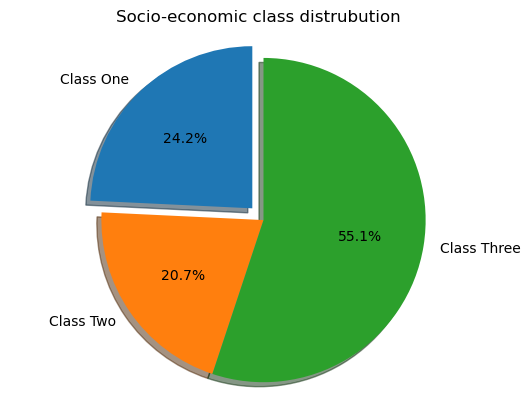

In [164]:
labels = ['Class One','Class Two','Class Three']
sizes = [len(ps_class_one),len(ps_class_two),len(ps_class_three)]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal') 
plt.title('Socio-economic class distrubution')
plt.show()

The graph above shows the Socio-economic class distribution of all the passengers ranging from 1 to 3.

In [17]:
df['Seat'] = df['Ticket'].astype(str) + '-' + df['Cabin']
seat = df['Seat']
seat.to_csv('passenger_seat.csv')

In [36]:
empty_seats = df[df['Seat'].isna()]
len(empty_seats)

687

# Seats and Cabins
Out of 891 seats and cabins, 687 seats and cabin are full

In [35]:
empty_seat_fares = df.loc[df['Seat'].isna(), 'Fare']
fare_prices = empty_seat_fares.values
round(fare_prices.mean(),2)

19.16

# Price for a seat

To get a seat on the ship, the passengers had to pay more than 19.16.

In [38]:
southhampton = df[df['Embarked']=='S']
len(southhampton)

644

In [39]:
queenstown = df[df['Embarked']=='Q']
len(queenstown)

77

In [40]:
cherbourg = df[df['Embarked']=='C']
len(cherbourg)

168

In [43]:
southhampton.to_excel('From_Southhampton.xlsx')
queenstown.to_excel('From_Queenstown.xlsx')
cherbourg.to_excel('From_cherbourg.xlsx')

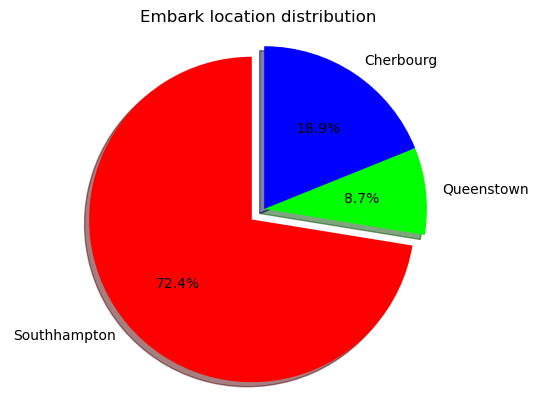

In [47]:
labels = ['Southhampton','Queenstown','Cherbourg']
sizes = [len(southhampton),len(queenstown),len(cherbourg)]

explode = (0.1, 0, 0)
COLORS = ['#FF0000', '#00FF00', '#0000FF']

plt.pie(sizes, explode=explode,labels=labels,colors=COLORS,autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal') 
plt.title('Embark location distribution')
plt.show()

The pie chart above is the graphical representation of passengers from Cherbourg, Queenstown and Southhampton

The graph above shows that out of all the passengers 72.4% are from Southhampton, 18.9% are from Cherbourg and 8.7% are from Queenstown.

# Thus, this is the data analysis done by Anishka Mukherjee, roll number:8
# Thank you!